<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/course1_2_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random

In [ ]:
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
n_samples = 100000
X, y = make_blobs(n_samples=n_samples, n_features=10, centers=10, cluster_std=1.5, random_state=6)

In [ ]:
X.shape, y.shape

((100000, 10), (100000,))

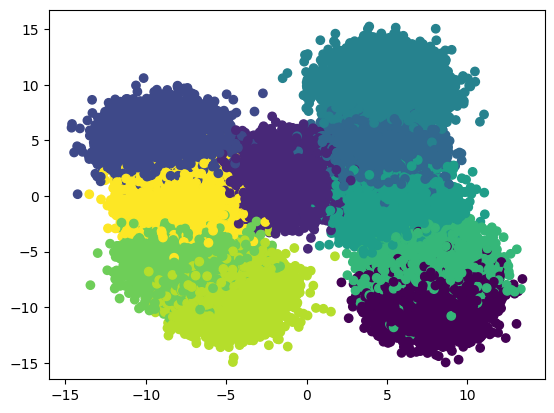

In [ ]:
plt.scatter(X[:,0],X[:,3], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
def visualize(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, y_pred = None):
    plt.figure(figsize=(24,6))

    plt.subplot(1,3,1)
    plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
    plt.title('Train')

    plt.subplot(1,3,2)
    plt.scatter(X_test[:,0], X_test[:,2], c=y_test)
    plt.title('Test')

    if y_pred != None:
        plt.subplot(1,3,3)
        plt.scatter(X_test[:,0], X_test[:,2], c=y_pred)
        plt.title('Prediction')


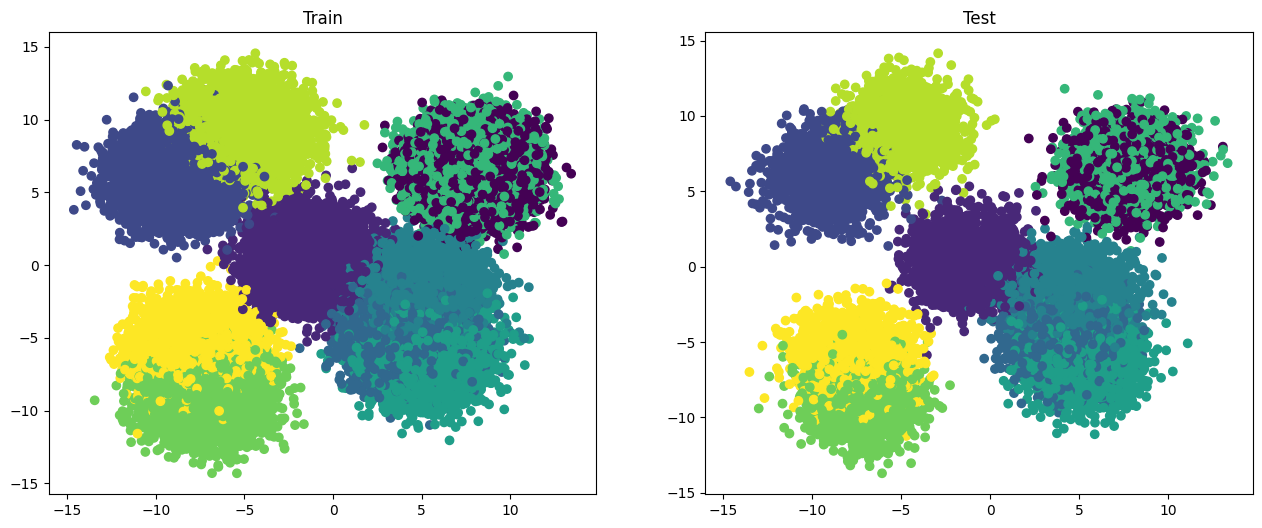

In [ ]:
visualize()

In [ ]:
def fn_accuracy(y_true, y_pred):
    return torch.eq(y_true,y_pred).sum().item() / len(y_true) * 100

In [ ]:
X_train, X_test = torch.from_numpy(X_train).type(torch.float), torch.from_numpy(X_test).type(torch.float)
y_train, y_test = torch.from_numpy(y_train).type(torch.float), torch.from_numpy(y_test).type(torch.float)

In [ ]:
class MultyClassification(nn.Module):
    def __init__(self):
        super().__init__()


        self.layer1 = nn.Linear(in_features=10, out_features=16)

        self.act = nn.Tanh()

        self.layer2 = nn.Linear(in_features=16, out_features=64)

        self.layer3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer3(self.act(self.layer2(self.act(self.layer1(x)))))

In [ ]:
torch.manual_seed(6)
model = MultyClassification()

4.795

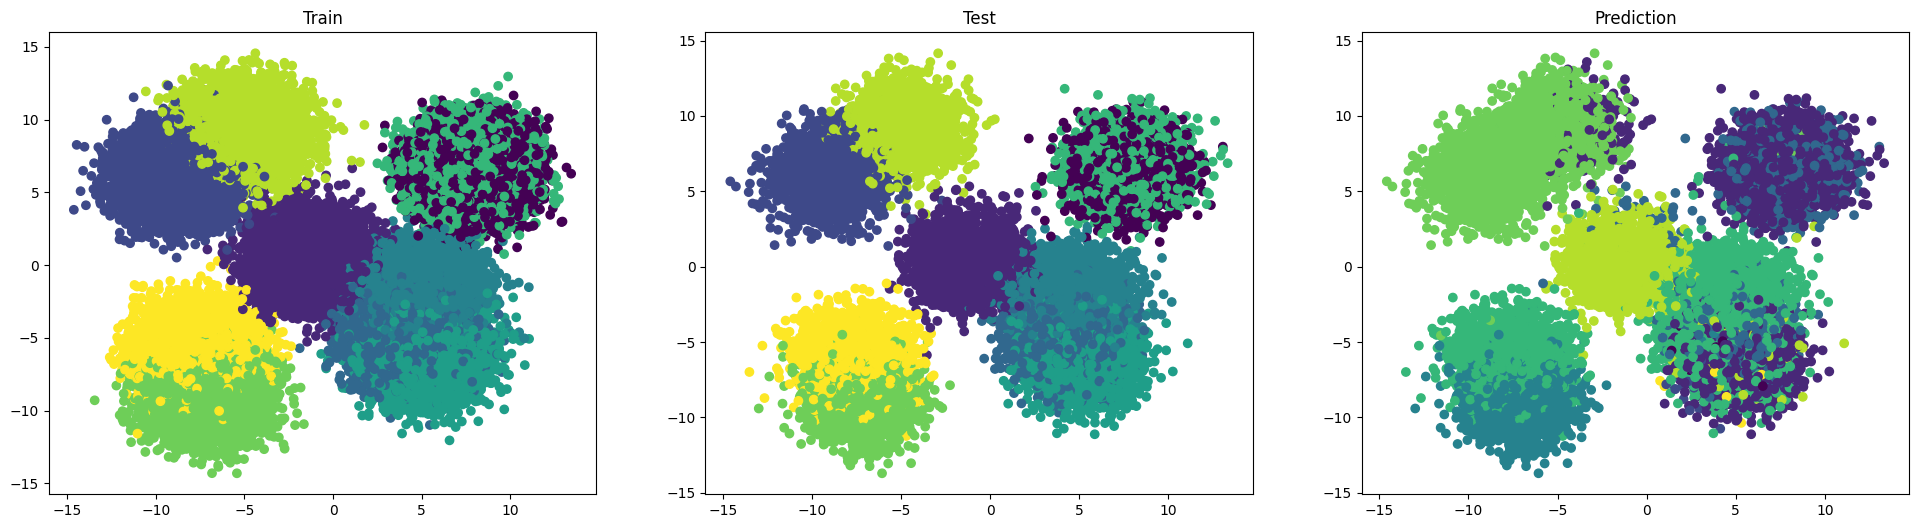

In [ ]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)

y_prob = torch.softmax(y_pred, dim=1)
y_labels = y_prob.argmax(dim=1)
y_labels

visualize(y_pred=y_labels)
fn_accuracy(y_test, y_labels)

In [ ]:
model.to(device)
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [ ]:
fn_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.05)

In [ ]:
y_train.shape

torch.Size([80000])

In [ ]:
# train

epochs = 1000

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = fn_loss(y_pred, y_train.type(torch.long))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # test

    if epoch % 100 == 0:
        model.eval()

        with torch.inference_mode():
            y_pred = model(X_test)

        y_prob = torch.softmax(y_pred, dim=1)
        y_labels = y_prob.argmax(dim=1)

        test_loss = fn_loss(y_pred, y_test.type(torch.long))

        acc = fn_accuracy(y_test, y_labels)
        print(f"Epoch: {epoch}, train loss = {loss:.5f}, test loss = {test_loss:.5f}, accuracy = {acc:.2f}%")


Epoch: 0, train loss = 2.39070, test loss = 2.31253, accuracy = 8.76%
Epoch: 100, train loss = 0.21816, test loss = 0.21489, accuracy = 100.00%
Epoch: 200, train loss = 0.07737, test loss = 0.07674, accuracy = 100.00%
Epoch: 300, train loss = 0.04392, test loss = 0.04366, accuracy = 100.00%
Epoch: 400, train loss = 0.03001, test loss = 0.02987, accuracy = 100.00%
Epoch: 500, train loss = 0.02257, test loss = 0.02247, accuracy = 100.00%
Epoch: 600, train loss = 0.01798, test loss = 0.01791, accuracy = 100.00%
Epoch: 700, train loss = 0.01489, test loss = 0.01483, accuracy = 100.00%
Epoch: 800, train loss = 0.01267, test loss = 0.01263, accuracy = 100.00%
Epoch: 900, train loss = 0.01101, test loss = 0.01097, accuracy = 100.00%


100.0

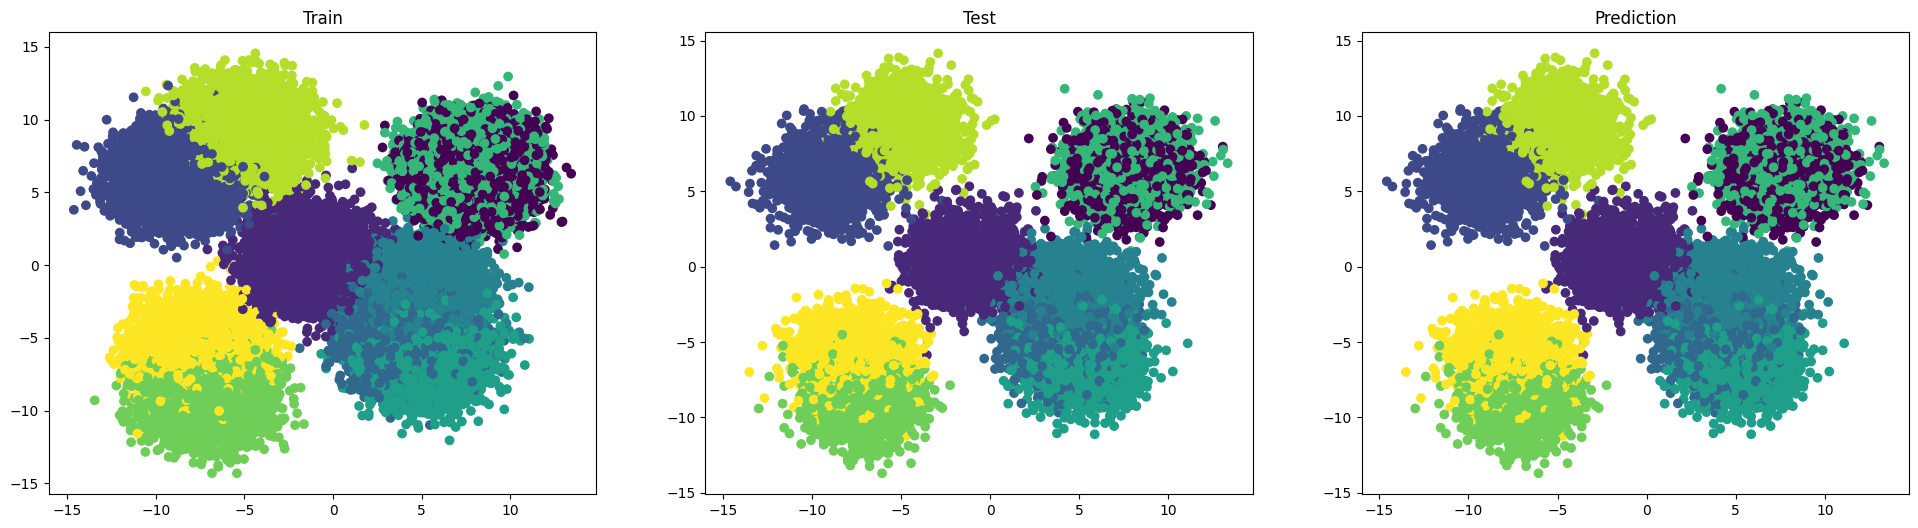

In [ ]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)

y_prob = torch.softmax(y_pred, dim=1)
y_labels = y_prob.argmax(dim=1)
y_labels

visualize(y_pred=y_labels.cpu())
fn_accuracy(y_test, y_labels)